In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
import matplotlib
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('precision', 12);


def load_dataset(name):
    dataset = pd.read_csv(name, header=0, delimiter=',')
    return dataset


dataset = load_dataset('customerTargeting.csv')
data = dataset.values
labels = dataset.columns.values

In [3]:
#Dataset Analysis

In [4]:
dataset.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,...,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000
mean,2.70878,14.42402,10.48565,24.90967,10.98807,13.41208,10.16103,10.74547,14.16903,3.25106,...,-0.02931,-0.00672,-0.00415,0.00883,0.00000,-0.22843,-0.10373,0.00041,1.91713,1.03172
std,1.85772,10.70079,8.38420,18.17495,5.63598,10.09003,7.49504,7.96425,9.86673,8.48121,...,1.22075,1.06820,0.66324,0.68342,0.32287,3.39090,1.94442,0.09276,0.30218,0.73104
min,1.05000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-27.00000,...,-4.68411,-4.31983,-2.51292,-3.11884,-2.00000,-15.20274,-9.18172,-0.75000,0.00000,0.00000
25%,1.66700,6.00000,4.00000,10.00000,6.00000,5.00000,4.00000,4.00000,6.00000,-2.00000,...,-0.71641,-0.53122,-0.44041,-0.40681,0.00000,-2.22223,-1.29347,-0.05433,1.71000,0.00000
50%,2.15000,13.00000,9.00000,22.00000,11.00000,12.00000,9.00000,9.00000,13.00000,1.00000,...,0.00000,0.00000,0.00000,0.00107,0.00000,-0.11938,-0.01249,0.00000,1.85000,1.00000
75%,2.80000,21.00000,15.00000,36.00000,16.00000,20.00000,15.00000,16.00000,21.00000,7.00000,...,0.65463,0.49050,0.41091,0.45010,0.00000,1.80933,1.03523,0.05483,2.02000,2.00000
max,23.00000,52.00000,47.00000,94.00000,20.00000,61.00000,43.00000,48.00000,52.00000,48.00000,...,4.82114,4.39628,2.98714,2.83055,2.00000,12.56270,8.20958,0.66667,4.33000,2.00000


In [37]:
dataset.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50000,1,3,4,5,1,1,4,6,0,...,-0.38370,-0.06545,0.58400,0.48800,0,-3.23200,-1.94400,-0.00794,1.76000,2
1,2.20000,24,22,46,10,24,28,18,22,-4,...,-0.34684,-0.15974,-0.94761,0.46354,0,-5.34217,-1.32135,0.18106,1.85000,1
2,12.00000,7,4,11,18,8,11,2,10,-3,...,-2.67393,-1.59230,0.52530,-0.46717,0,-6.56652,-4.17640,-0.04028,2.05000,2
3,1.91000,8,5,13,14,6,7,6,9,-1,...,0.61603,0.40494,-1.50692,0.74196,0,-2.43812,-0.78713,-0.01210,1.82000,0
4,2.50000,23,16,39,14,33,25,18,27,8,...,-1.05721,-1.15929,0.75101,-0.18205,0,-1.25973,0.05957,0.04261,1.99000,2


In [5]:
y = data[:, 70]
len(y)

6620

In [6]:
X = data[:, [i for i in range(69)]]
len(X)

6620

<AxesSubplot:xlabel='target', ylabel='count'>

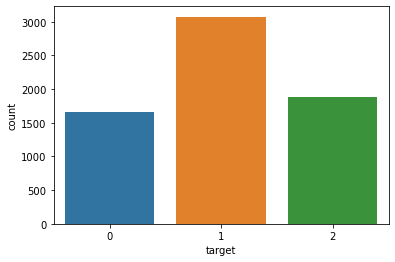

In [7]:
sns.countplot(dataset['target'])

<AxesSubplot:>

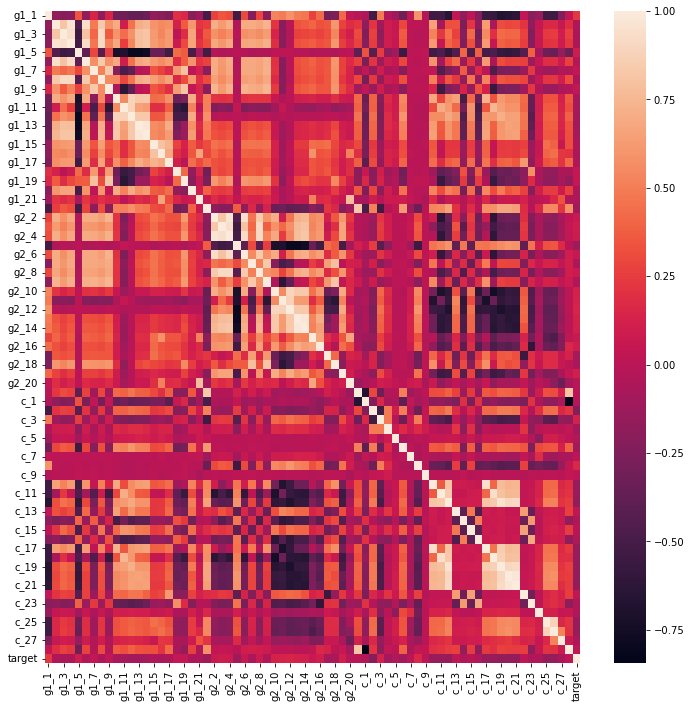

In [8]:
corr = dataset.corr()
figure(num=None, figsize=(12, 12))

sns.heatmap(corr)

In [9]:
corr_target = corr['target']
corr_target

g1_1      0.23235
g1_2     -0.04270
g1_3     -0.06241
g1_4     -0.05393
g1_5      0.08791
           ...   
c_25     -0.14781
c_26     -0.14923
c_27     -0.06214
c_28      0.02135
target    1.00000
Name: target, Length: 71, dtype: float64

In [10]:
#Variable list with correlation to target higher than a threshold
threshold = 0.16
for i in range(70):
    if corr_target[i] <-threshold or corr_target[i] >threshold:
        print(str(dataset.columns.values[i]) + " variable nº "+str(i)+ " --->  " + str(corr_target[i]))
        

g1_1 variable nº 0 --->  0.23234998298116402
c_2 variable nº 43 --->  -0.2193705322455647
c_8 variable nº 49 --->  0.1623622633170268
c_12 variable nº 53 --->  -0.1671398508042021
c_19 variable nº 60 --->  -0.16422370856431018
c_20 variable nº 61 --->  -0.16283372001064464


In [11]:
#Preprocessing

In [12]:
#PCA, fem una copia de els atributs per a fer pca
pcaX = X
pcaX

array([[ 4.50000000e+00,  1.00000000e+00,  3.00000000e+00, ...,
        -3.23200000e+00, -1.94400000e+00, -7.94352044e-03],
       [ 2.20000000e+00,  2.40000000e+01,  2.20000000e+01, ...,
        -5.34217368e+00, -1.32135450e+00,  1.81063922e-01],
       [ 1.20000000e+01,  7.00000000e+00,  4.00000000e+00, ...,
        -6.56652100e+00, -4.17640335e+00, -4.02769281e-02],
       ...,
       [ 2.50000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
         1.74344441e+00,  1.15972509e+00,  1.91948723e-02],
       [ 1.80000000e+00,  5.00000000e+00,  4.00000000e+00, ...,
         1.95916800e+00,  1.39641600e+00,  7.11798746e-02],
       [ 1.95000000e+00,  3.50000000e+01,  3.70000000e+01, ...,
        -3.36965072e+00, -4.92462849e-01,  4.25231278e-02]])

In [13]:
pca = PCA()
pca.fit(pcaX)
pca_data = pca.transform(pcaX)
per_var = pca.explained_variance_ratio_*100 
cumulative_sum = np.cumsum(per_var)

In [14]:
cumulative_sum

array([ 40.58060485,  76.00490022,  89.12409619,  91.84085198,
        93.56986026,  94.72502376,  95.72022063,  96.51322355,
        97.07658297,  97.62606317,  98.03998547,  98.38953168,
        98.70060142,  98.94405271,  99.1717079 ,  99.376144  ,
        99.54786856,  99.69940079,  99.80045925,  99.85014789,
        99.88904337,  99.92393842,  99.94568227,  99.95739638,
        99.96554566,  99.97184245,  99.97637602,  99.98041544,
        99.98418322,  99.98740058,  99.99032549,  99.99260462,
        99.99478206,  99.99673691,  99.99790655,  99.99842093,
        99.99882661,  99.99910082,  99.99932818,  99.99954189,
        99.99970953,  99.99981132,  99.99990674, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

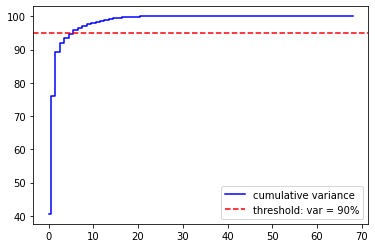

In [15]:
#Plot of % of cumulative variance by number of variables, by the numbers on the previous
#cell we can see that we can attain a 95% of cumulative variance with only 7 atributes.

plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid', color="blue",label='cumulative variance')
plt.axhline(y=95, color='red', linestyle='--',label='threshold: var = 90%')
plt.legend() 
plt.show()

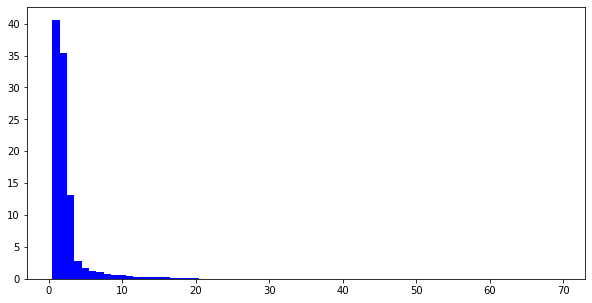

In [16]:
#Plot of % of explained variance
plt.figure(figsize=(10,5))
#sns.stripplot(x=xs, y=per_var)
plt.bar(x=range(1, len(per_var)+1), height=per_var, width=1, color="blue", linewidth=0.5)
plt.show()

In [17]:
labels = ['PC'+str(i) for i in range(1, 8)]
pca_variables = pd.DataFrame(pca_data[:,:7], columns=labels)
pca_variables

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-5.90273,-43.11757,-13.58131,6.83703,-2.85664,-3.98388,-4.76238
1,-14.93590,43.07816,17.14840,-5.70284,-13.31668,-9.58449,8.78940
2,-61.61500,-16.09908,-22.24968,-10.85921,9.40251,1.97847,2.55219
3,17.44452,-31.32771,12.53422,-1.02831,-3.29365,6.67725,-4.34045
4,-23.47523,50.27620,9.05688,-1.84171,6.38836,-3.24868,14.75131
...,...,...,...,...,...,...,...
6615,6.62024,-34.83419,-25.72939,-0.33348,-4.17543,-7.17105,-7.51110
6616,34.76567,-0.91862,2.55889,-2.59402,2.34763,-1.82334,4.34505
6617,-4.84531,-26.28720,-3.88406,-25.60577,0.60583,4.01539,-3.86325
6618,10.39394,-40.51628,-7.89616,0.16797,0.70393,2.14239,0.50100


In [18]:
final_dataset = pca_variables
final_dataset.insert(7, "target", y, True)
final_dataset.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
count,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000
mean,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,1.03172
std,39.91978,37.29748,22.69773,10.32890,8.24000,6.73520,6.25149,0.73104
min,-183.04645,-57.55747,-90.31827,-40.82619,-33.76105,-27.07084,-26.22214,0.00000
25%,-18.58508,-31.04128,-14.95275,-5.94748,-4.67315,-3.81940,-3.55583,0.00000
50%,1.95104,-3.40645,-3.99127,0.62135,0.16575,0.08707,-0.16730,1.00000
75%,18.68772,25.98916,12.65907,5.75896,4.74892,3.82395,3.42777,2.00000
max,199.85785,137.17668,108.89680,44.45466,43.47900,35.39937,28.18796,2.00000


In [19]:
#Model testing

In [20]:
#Original Dataset models

In [21]:
#fem servir els atributs que hem vist abans amb major correlació amb target
orX = data[:,[0,43,49,53,60,61]]

In [22]:
ox_t, ox_v, oy_t, oy_v = train_test_split(orX, y, train_size=0.7)

In [23]:
logireg = LogisticRegression(C=2, fit_intercept=True, penalty='l2', tol=0.001, max_iter = 1000000)
logireg.fit(ox_t, oy_t)
print ("Correct classification Logistic ", 0.8*100, "% of the data: ", logireg.score(ox_v, oy_v))
print(metrics.classification_report(oy_v, logireg.predict(ox_v)))

Correct classification Logistic  80.0 % of the data:  0.5704934541792548
              precision    recall  f1-score   support

         0.0       0.42      0.01      0.02       509
         1.0       0.57      0.89      0.70       916
         2.0       0.57      0.57      0.57       561

    accuracy                           0.57      1986
   macro avg       0.52      0.49      0.43      1986
weighted avg       0.53      0.57      0.49      1986



In [24]:
svcLin = svm.LinearSVC(C=10, max_iter=10000)
svcLin.fit(ox_t,oy_t)
print ("\n\nCorrect classification SVM Linear ", 0.7*100, "% of the data: ", svcLin.score(ox_v, oy_v))
print(metrics.classification_report(oy_v, svcLin.predict(ox_v)))



Correct classification SVM Linear  70.0 % of the data:  0.553877139979859
              precision    recall  f1-score   support

         0.0       0.30      0.14      0.19       509
         1.0       0.59      0.86      0.70       916
         2.0       0.59      0.43      0.50       561

    accuracy                           0.55      1986
   macro avg       0.49      0.48      0.46      1986
weighted avg       0.51      0.55      0.51      1986



In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(ox_t, oy_t)
print(clf.score(ox_v, oy_v))

0.5478348439073515


In [26]:
hgb = HistGradientBoostingClassifier()
hgb.fit(ox_t, oy_t)
ls_preds = hgb.predict(ox_v)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', hgb.score(ox_v,oy_v))

Score of Histogram-based Gradient Boosting Regression Tree:  0.5599194360523666


In [27]:
clf_lr = BaggingClassifier(base_estimator=LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001), n_estimators=10, random_state=0).fit(ox_t, oy_t)
print("LR-Bagging accuracy: "+str(100*clf_lr.score(ox_v, oy_v)), "%")

LR-Bagging accuracy: 56.99899295065458 %


In [28]:
for est in [1,2,5,10]:
    a = AdaBoostClassifier(n_estimators=est).fit(ox_t, oy_t)
    print(str(est)+" AdaBoost accuracy: "+str(100*(a.score(ox_v,oy_v))))

1 AdaBoost accuracy: 58.86203423967774
2 AdaBoost accuracy: 58.86203423967774
5 AdaBoost accuracy: 58.76132930513596
10 AdaBoost accuracy: 58.45921450151057


In [29]:
#PCA dataset models

In [30]:
x_t, x_v, y_t, y_v = train_test_split(pca_variables, y, train_size=0.7)

In [31]:
logireg = LogisticRegression(C=2, fit_intercept=True, penalty='l2', tol=0.001, max_iter = 1000)
logireg.fit(x_t, y_t)
print ("Correct classification Logistic ", 0.7*100, "% of the data: ", logireg.score(x_v, y_v))
print(metrics.classification_report(y_v, logireg.predict(x_v)))

Correct classification Logistic  70.0 % of the data:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       493
         1.0       1.00      1.00      1.00       946
         2.0       1.00      1.00      1.00       547

    accuracy                           1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



In [32]:
svcLin = svm.LinearSVC(C=10, max_iter=10000)
svcLin.fit(x_t,y_t)
print ("\n\nCorrect classification SVM Linear ", 0.7*100, "% of the data: ", svcLin.score(x_v, y_v))
print(metrics.classification_report(y_v, svcLin.predict(x_v)))  



Correct classification SVM Linear  70.0 % of the data:  0.9869083585095669
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       493
         1.0       0.98      1.00      0.99       946
         2.0       0.99      0.99      0.99       547

    accuracy                           0.99      1986
   macro avg       0.99      0.98      0.99      1986
weighted avg       0.99      0.99      0.99      1986



In [33]:
clf = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0)
clf.fit(x_t, y_t)
print(clf.score(x_v, y_v))

0.9330312185297079


In [34]:
hgb = HistGradientBoostingClassifier()
hgb.fit(x_t, y_t)
ls_preds = hgb.predict(x_v)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', hgb.score(x_v,y_v))

Score of Histogram-based Gradient Boosting Regression Tree:  1.0


In [35]:
clf_lr = BaggingClassifier(base_estimator=LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001), n_estimators=3, random_state=0).fit(x_t, y_t)
print("LR-Bagging accuracy: "+str(100*clf_lr.score(x_v, y_v)), "%")

LR-Bagging accuracy: 100.0 %


In [36]:
for ests in [1,2,5,10]:
    a = AdaBoostClassifier(n_estimators=ests).fit(x_t, y_t)
    print(str(ests)+" AdaBoost accuracy: "+str(100*(a.score(x_v,y_v))))

1 AdaBoost accuracy: 75.17623363544814
2 AdaBoost accuracy: 100.0
5 AdaBoost accuracy: 100.0
10 AdaBoost accuracy: 100.0
